In [118]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [120]:
ski_df = pd.read_csv('Ski_resort.csv', sep = ',')

In [121]:
ski_df.head()

,Type,Bought_in,Date_of_purchase,Acquisition_mode,Schedule,Initial_day,Amount_of_days,Original_Resort,Hotel,Id,Selling_price,Total_price
0,Season,Regular_season,2019-01-24,Package,Extended_Hour,2018-11-15,Unlimited,Valle Silbador,Elton Hotel,WSP-19102,1950,2925.0
1,Season,Regular_season,2019-01-22,On_site,Extended_Hour,2018-11-15,Unlimited,Valle Silbador,False,WSP-19122,1950,2925.0
2,Season,Outside_season,2018-11-11,Online,Extended_Hour,2018-11-15,Unlimited,Valle Silbador,False,WSP-19131,1950,2925.0
3,Season,Regular_season,2018-01-10,On_site,Extended_Hour,2017-11-15,Unlimited,Valle Silbador,False,WSP-19152,1950,2925.0
4,Season,Regular_season,2018-01-31,Online,Extended_Hour,2017-11-15,Unlimited,Valle Silbador,False,WSP-19154,1950,2925.0


In [122]:
ski_df.Hotel = ski_df.Hotel.replace('False','no_info')#в целом шило на мыло. Теперь, гости, которые не бронировали отель к каталке, 
#будут в категории no_info

In [123]:
print(ski_df.shape)

(906, 12)


In [124]:
ski_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              906 non-null    object 
 1   Bought_in         906 non-null    object 
 2   Date_of_purchase  906 non-null    object 
 3   Acquisition_mode  906 non-null    object 
 4   Schedule          906 non-null    object 
 5   Initial_day       906 non-null    object 
 6   Amount_of_days    906 non-null    object 
 7   Original_Resort   906 non-null    object 
 8   Hotel             906 non-null    object 
 9   Id                906 non-null    object 
 10  Selling_price     906 non-null    int64  
 11  Total_price       906 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 85.1+ KB


In [125]:
ski_df.Acquisition_mode.unique()

array(['Package', 'On_site', 'Online', 'Red HEROIC'], dtype=object)

In [126]:
ski_df.Amount_of_days = ski_df.Amount_of_days.replace('Unlimited',10)#в принципе это такая категориальная переменная скорее, 10 = сезонный скипасс

In [127]:
ski_df.Amount_of_days = ski_df.Amount_of_days.astype(np.int64)

In [128]:
ski_df.Hotel.unique()

array(['Elton Hotel', 'no_info', 'Ridossan Hotel', 'Haiit Hotel',
       'OI Hotels', 'Ski Inn'], dtype=object)

In [129]:
ski_df.Date_of_purchase = pd.to_datetime(ski_df['Date_of_purchase'])#приведение к типу данных date
ski_df.Initial_day = pd.to_datetime(ski_df['Initial_day'])


In [130]:
ski_df['Month_of_purchase'] = ski_df['Date_of_purchase'].values.astype('<M8[M]')#новая колонка, где будет жить месяц оплаты для разных группировок

In [131]:
ski_df.Date_of_purchase.min()

Timestamp('2017-04-05 00:00:00')

In [132]:
ski_df.Date_of_purchase.max()

Timestamp('2019-04-01 00:00:00')

In [133]:
ski_r = ski_df[['Id','Bought_in','Date_of_purchase','Month_of_purchase','Initial_day','Schedule','Amount_of_days','Original_Resort','Hotel','Total_price']]


In [134]:
ski_r.head(5)#кажись, ДФ готовый к работе. Мы имеем данные о продаже скипассов на курорты за период апрель 2017 - апрель 2019;
#скипассы бывают на определенное количество дней и безлимит на сезон/ они продаются вне сезона и в течение сезона (две категории)/
#есть скипасы на утренние часы/ полуденные и на целый день/
# также есть люди,котрые со скипассом покупали себе отель
#выходит, вcе Айди уникальны, т.е. покупателей мы не идентифицируем, только транзакции

,Id,Bought_in,Date_of_purchase,Month_of_purchase,Initial_day,Schedule,Amount_of_days,Original_Resort,Hotel,Total_price
0,WSP-19102,Regular_season,2019-01-24,2019-01-01,2018-11-15,Extended_Hour,10,Valle Silbador,Elton Hotel,2925.0
1,WSP-19122,Regular_season,2019-01-22,2019-01-01,2018-11-15,Extended_Hour,10,Valle Silbador,no_info,2925.0
2,WSP-19131,Outside_season,2018-11-11,2018-11-01,2018-11-15,Extended_Hour,10,Valle Silbador,no_info,2925.0
3,WSP-19152,Regular_season,2018-01-10,2018-01-01,2017-11-15,Extended_Hour,10,Valle Silbador,no_info,2925.0
4,WSP-19154,Regular_season,2018-01-31,2018-01-01,2017-11-15,Extended_Hour,10,Valle Silbador,no_info,2925.0


#1

In [135]:
#1 хотелось бы продемонстирировать все продажи и все посещения суммарно с динамико по месяцам
ski_total = ski_r.groupby('Month_of_purchase', as_index = False).agg({'Id':'count','Total_price':'sum'})
ski_total.head()

,Month_of_purchase,Id,Total_price
0,2017-04-01,8,6375.0
1,2017-05-01,9,14340.0
2,2017-06-01,10,12705.0
3,2017-07-01,12,13522.5
4,2017-08-01,14,12780.0


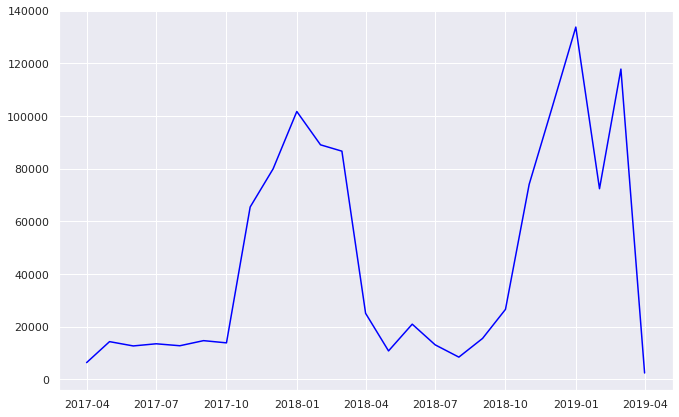

In [136]:
plt.plot(ski_total['Month_of_purchase'],ski_total['Total_price'], color = 'blue')


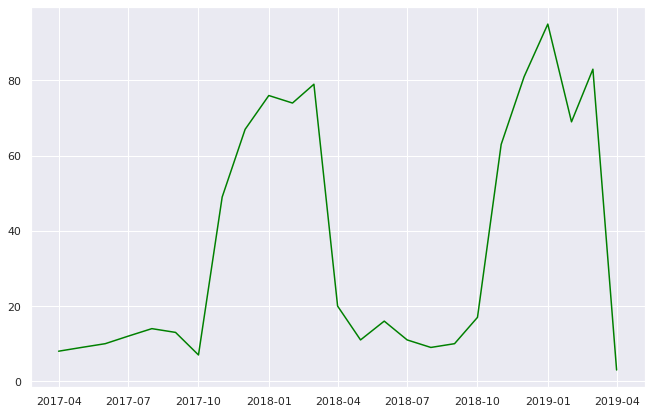

In [137]:
plt.plot(ski_total['Month_of_purchase'],ski_total['Id'], color = 'green')

Несопоставимые величины, не получается вывести на один график. Динамика продаж повторяет динамику посещений. Видно, что показатели 2019 выше, чем 2018. Провал после новогодних каникул просматривается, возможно, потому что очень эффективно отработали новогодние, потом не смогли удержать. Нужно смотреть какие маркетинговые инструменты применялись, падение нижу уровня 2018 это очень плохо, сезон и так к не длинный, нельзя такого допускать. Потом удалось как-то отыграть.

#2

In [ ]:
ski_r['year'] = ski_r['Date_of_purchase'].values.astype('<M8[Y]')


In [139]:
ski_resort = ski_r.pivot_table(index = 'Original_Resort', columns = 'year', values = 'Total_price', aggfunc = 'sum')

In [140]:
ski_resort.head()

year,2017-01-01,2018-01-01,2019-01-01
Original_Resort,,,
Cresta Velo,13860.0,33600.0,23100.0
Montaña Panadero,16590.0,38010.0,22050.0
Monte Japón,NaN,8190.0,840.0
Puente Roto,14490.0,16800.0,16380.0
Ski Comanche,5040.0,20160.0,8400.0


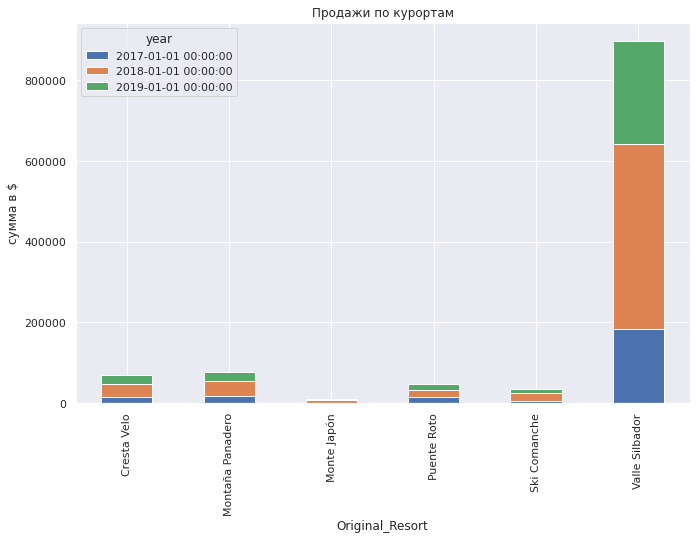

In [141]:
ski_resort.plot(kind = 'bar', title = 'Продажи по курортам', ylabel = 'сумма в $',stacked = True)

Есть явный лидер и явный аутсайдер, а остальные 4 курорта конкурируют на равных +/- Но с огромным оставанием от лидера. Также интресно, что 2018 год был заметно успешнее 2019 у всех

№3 

In [142]:
ski_bought_in = ski_r.groupby('Bought_in').agg({'Total_price':'sum'})

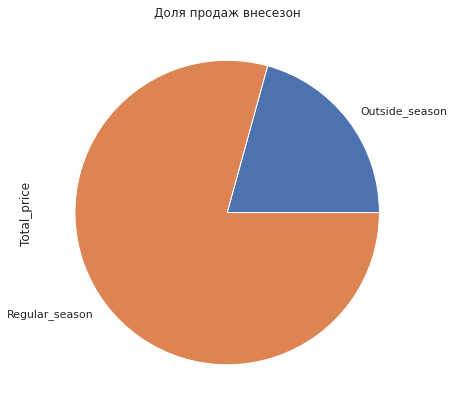

In [143]:
ski_bought_in['Total_price'].plot(kind = 'pie', title = 'Доля продаж внесезон')

вот такую долю курорты продают по раннему бронированию. Это хорошая доля, значит маркетинг работает, значит оправданно
давать маркетингу бюджет, чтобы эта доля сохранялась/росла, потому что курортам летом тоже очень нужен оборот

#4

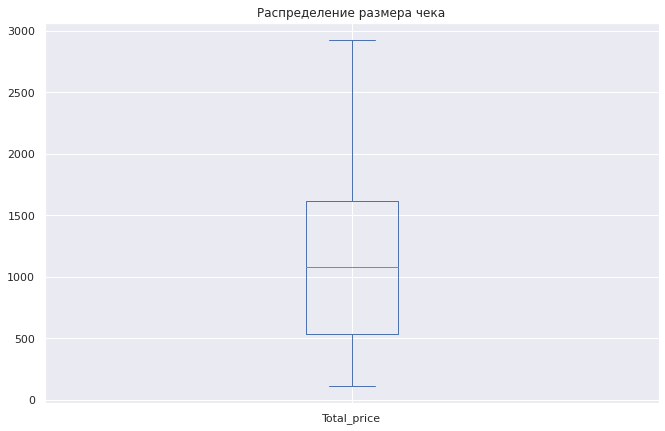

In [144]:
ski_r['Total_price'].plot(kind = 'box', grid = True, title = 'Распределение размера чека')

По ценам вот такое распределение имеет в общем. 

#5

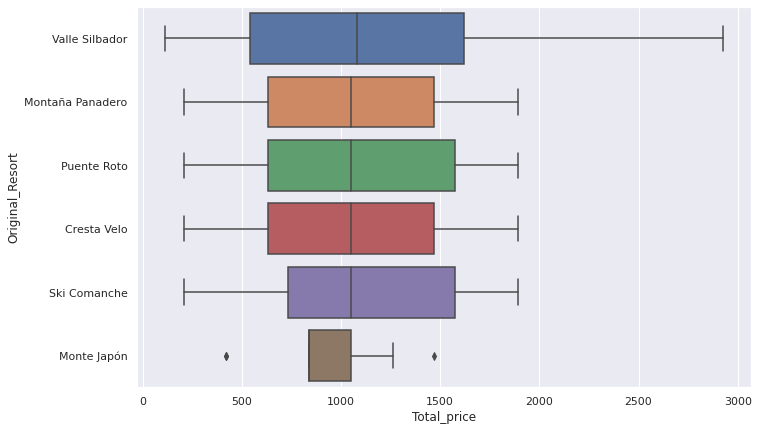

In [145]:
sns.boxplot(data = ski_r, y = 'Original_Resort', x = 'Total_price')

То же самое распределение чека по курортам. Silbador который фаворит имеет и медиану чуть повыше, и максимум сильно выше. Остальные четыре конкурента равных явно две тенденции демонстрируют разных: сиреневый и зеленый дороже стремятся продавать, но мы помним, что у них финансовые показатели намного хуже, чем у желтого с красным.

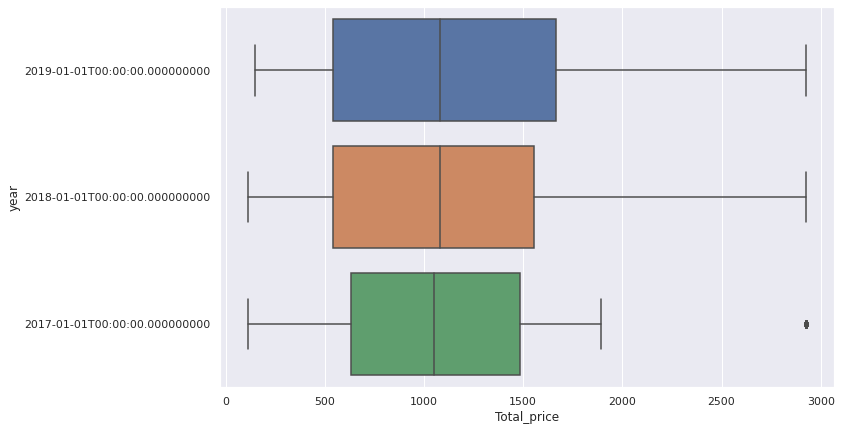

In [146]:
sns.boxplot(data = ski_r, y = 'year', x = 'Total_price')

2018 и 2019 корректно сравнивать. Вырос в 2019 межквартильный размах в сторону дорогих продаж, но мы помним, что в абсолютном выражении показатель продаж упал.

In [147]:
ski_pass = ski_r.pivot_table(index = 'Original_Resort', columns = 'Amount_of_days', values = 'Id', aggfunc = 'count' ).fillna(0)

In [148]:
ski_pass.head(6)

Amount_of_days,1,2,3,4,5,6,7,8,9,10
Original_Resort,,,,,,,,,,
Cresta Velo,8.0,6.0,5.0,4.0,10.0,9.0,9.0,8.0,6.0,0.0
Montaña Panadero,8.0,8.0,7.0,5.0,10.0,7.0,14.0,7.0,6.0,0.0
Monte Japón,0.0,2.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0
Puente Roto,3.0,6.0,4.0,4.0,5.0,4.0,6.0,6.0,5.0,0.0
Ski Comanche,5.0,2.0,1.0,5.0,5.0,0.0,5.0,4.0,4.0,0.0
Valle Silbador,68.0,59.0,59.0,47.0,54.0,61.0,67.0,56.0,66.0,148.0


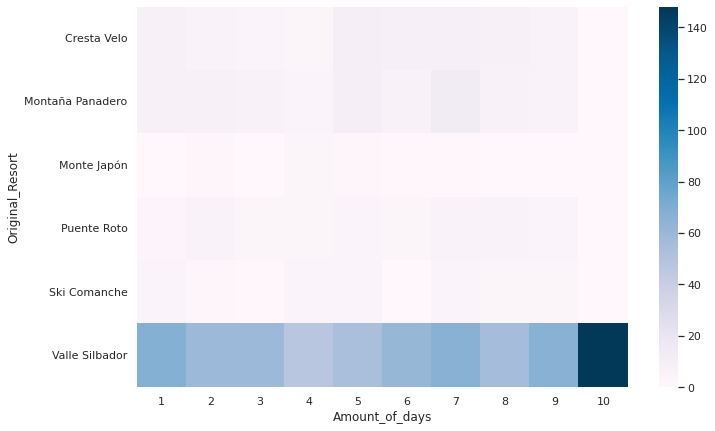

In [149]:
sns.heatmap(ski_pass, cmap = 'PuBu')

Sibador доминирует по количеству проданных скипасов, понятное дело, но интересно, что он больше всего продает сезонных скипасов, это необычно. А кроме него сезонников вообще никто не продает. Также видно, что скипассы на 6-9 дней пользуются популярностью даже больше, чем на 2-3, а на 4 дня вообще никто почти не покупает.

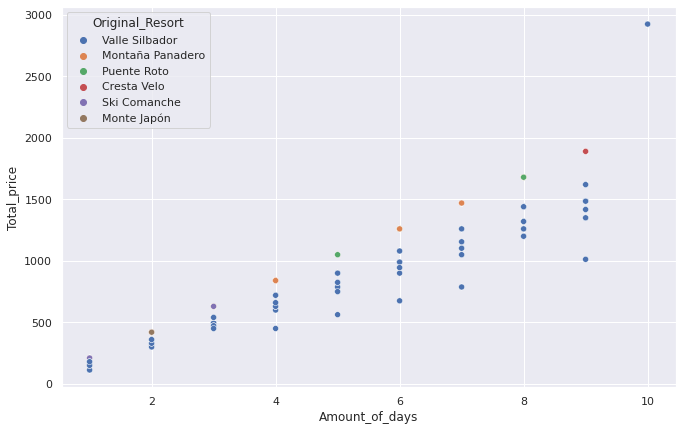

In [154]:
sns.scatterplot(data = ski_r, x = 'Amount_of_days', y = 'Total_price', hue = 'Original_Resort')

Такой синтетический пример: взаимосвязь количества катальных дней и цены скипасса. Взаимосвязь прямая. Использовал дополнительный параметр, который подсвечивает цену по каждому курорту, и оказалось на самом массовом курорте самые дешевые скипассы!